  #Лабораторна робота 2. Аналіз даних. Робота з даними csv
  [Посилання на GitHub](https://github.com/unIns1de/Homework-from-KSVD/blob/main/%D0%91%D0%B0%D1%80%D1%82%D0%BE%D1%88_%D0%9B%D0%A0_2.ipynb)

1. Прочитайте CSV файл (використовуйте метод read_csv):

In [10]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = next(iter(uploaded))

df = pd.read_csv(file_name, encoding='ISO-8859-1')

Saving Global YouTube Statistics.csv to Global YouTube Statistics (1).csv


2. Виведіть перші п'ять рядків (використовується метод head):

In [11]:
print("Перші 5 рядків:")
print(df.head())

Перші 5 рядків:
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   


3. Виведіть розміри датасету (використовуйте метод shape):


In [22]:
print("\nРозмір датасету:", df.shape)


Розмір датасету: (995, 28)


4. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum).
Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

In [23]:
print("\nПропущені значення у кожному стовпці:")
print(df.isna().sum())


Пропущені значення у кожному стовпці:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month        

5. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.


In [27]:
cols_to_numeric = ['subscribers', 'video views', 'uploads',
                   'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
                   'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days',
                   'Gross tertiary education enrollment (%)', 'Population',
                   'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in cols_to_numeric:
    df[col] = df[col].fillna(df[col].mean()).astype(float)

6. Ще раз перевірте кількість пропусків.


In [28]:
print("\nПропущені значення після обробки:")
print(df.isna().sum())


Пропущені значення після обробки:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 5
created_month            

7. Перевірте, скільки унікальних країн представлено у колонці "Country"


In [29]:
print("\nКількість унікальних країн:", df['Country'].nunique())


Кількість унікальних країн: 49


8. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):


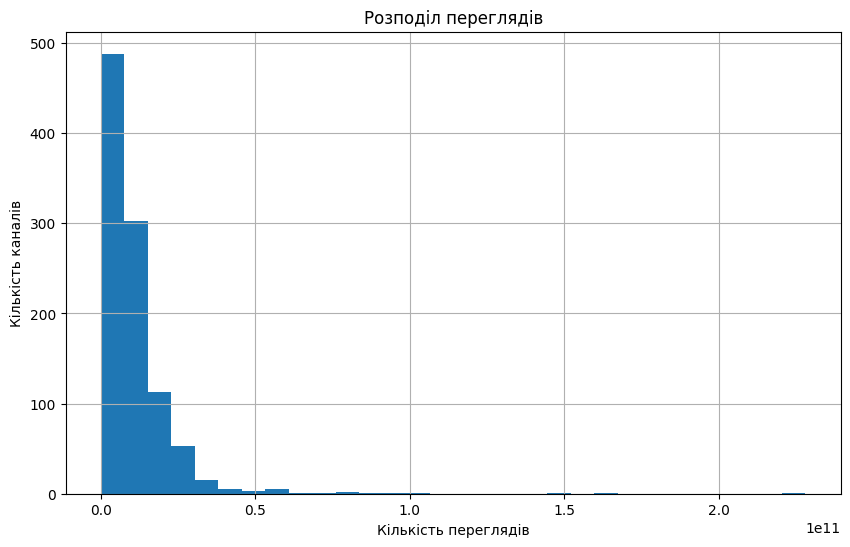

In [30]:
plt.figure(figsize=(10, 6))
df['video views'].plot(kind='hist', bins=30, title='Розподіл переглядів')
plt.xlabel('Кількість переглядів')
plt.ylabel('Кількість каналів')
plt.grid(True)
plt.show()

9. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)


In [31]:
print("\nМаксимум переглядів:", df['video views'].max())
print("Мінімум переглядів:", df['video views'].min())
print("Середнє переглядів:", df['video views'].mean())


Максимум переглядів: 228000000000.0
Мінімум переглядів: 0.0
Середнє переглядів: 11039537052.03819


10.Знайдіть країну, де найбільше відео було завантажено на YouTube


In [32]:
country_uploads = df.groupby('Country')['uploads'].sum().sort_values(ascending=False)
print("\nКраїна з найбільшою кількістю завантажених відео:", country_uploads.index[0])


Країна з найбільшою кількістю завантажених відео: India


11. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.

In [33]:
max_uploads_title = df[df['uploads'] == df['uploads'].max()]['Title'].values[0]
min_uploads_title = df[df['uploads'] == df['uploads'].min()]['Title'].values[0]

print("\nНазва відео з найбільшою кількістю завантажень:", max_uploads_title)
print("Назва відео з найменшою кількістю завантажень:", min_uploads_title)


Назва відео з найбільшою кількістю завантажень: ABP NEWS
Назва відео з найменшою кількістю завантажень: Music


# Завдання 2

1. Прочитайте csv файл (метод read_csv)

In [35]:
uploaded = files.upload()
file_name2 = next(iter(uploaded))
df = pd.read_csv(file_name2, encoding='ISO-8859-1')

Saving bestsellers with categories.csv to bestsellers with categories (1).csv


2. Виведіть перші 10 рядків (метод head)

In [44]:
print("Перші 10 рядків:")
print(df.head(10))

Перші 10 рядків:
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   
6  A Game of Thrones / A Clash of Kings / A Storm...   
7                     A Gentleman in Moscow: A Novel   
8      A Higher Loyalty: Truth, Lies, and Leadership   
9                          A Man Called Ove: A Novel   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424     

3. Виведіть розміри датасету (метод shape) Про скільки книг зберігає дані датасет?

In [43]:
print("\nРозмір датасету (рядки, стовпці):")
print(df.shape)


Розмір датасету (рядки, стовпці):
(550, 7)


4. Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення. df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [42]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print("\nНові назви колонок:")
print(df.columns)


Нові назви колонок:
Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


5. Вивести кількість пропусків у кожному стовпчику. Чи є в якихось змінних пропуски? (Так / ні)

In [45]:
print("\nКількість пропусків у кожному стовпчику:")
print(df.isnull().sum())


Кількість пропусків у кожному стовпчику:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


6. За допомогою методу unique  перевірте. Які є унікальні жанри в стовпці genre. Які є унікальні жанри?

In [46]:
print("\nУнікальні жанри в стовпці genre:")
print(df['genre'].unique())


Завдання 6. Унікальні жанри в стовпці genre:
['Non Fiction' 'Fiction']


7. Визначте максимальну, мінімальну, медіанну ціну за допомогою методів  max, min, mean, median Максимальна ціна? Мінімальна ціна?Середня ціна? Медіанна ціна?

In [ ]:
print("\nСтатистика по ціні:")
print(f"Максимальна ціна: {df['price'].max()}")
print(f"Мінімальна ціна: {df['price'].min()}")
print(f"Середня ціна: {df['price'].mean()}")
print(f"Медіанна ціна: {df['price'].median()}")

8. Виконайте наступні завдання з пошуку і сортування даних

Який рейтинг у датасеті найвищий?  

Скільки книг мають такий рейтинг?  

Яка книга має найбільше відгуків?  

З тих книг, що потрапили до Топ-50 у 2010 році, яка книга найдорожча ?

Скільки книг жанру Fiction потрапили до Топ-50 у 2012 році  

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або метод isin)?  

Завдання 8.1.

In [ ]:
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг: {max_rating}")

Завдання 8.2

In [ ]:
print(f"Кількість книг з таким рейтингом: {df[df['user_rating'] == max_rating].shape[0]}")


Завдання 8.3

In [48]:
most_reviews = df[df['reviews'] == df['reviews'].max()]
print("\nКнига з найбільшою кількістю відгуків:")
print(most_reviews[['name', 'reviews']])



Книга з найбільшою кількістю відгуків:
                        name  reviews
534  Where the Crawdads Sing    87841


Завдання 8.4

In [51]:
expensive_2010 = df[df['year'] == 2010].sort_values(by='price', ascending=False).head(1)
print("\nНайдорожча книга 2010 року:")
print(expensive_2010[['name', 'price']])



Найдорожча книга 2010 року:
                                                  name  price
272  Publication Manual of the American Psychologic...     46


Завдання 8.5

In [50]:
fiction_2012 = df[(df['genre'] == 'Fiction') & (df['year'] == 2012)]
print(f"\nКількість книг жанру Fiction у 2012 році: {fiction_2012.shape[0]}")



Кількість книг жанру Fiction у 2012 році: 21


Завдання 8.6

In [49]:
high_rating_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
print(f"\nКількість книг з рейтингом 4.9 у 2010 та 2011 роках: {high_rating_2010_2011.shape[0]}")


Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


9. Вивести максимальну і  мінімальну ціну для жанру Fiction I NonFiction (за допомогою методів  groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Використовуйте тількі потрібні вам стовпці.

In [52]:
price_by_genre = df[df['genre'].isin(['Fiction', 'Non Fiction'])].groupby('genre')['price'].agg(['min', 'max'])
print("\nЗавдання 9. Мінімальна і максимальна ціна для жанру Fiction та Non Fiction:")
print(price_by_genre)


Завдання 9. Мінімальна і максимальна ціна для жанру Fiction та Non Fiction:
             min  max
genre                
Fiction        0   82
Non Fiction    0  105
